In [8]:
import pandas as pd
import numpy as np
import setup_jwlab
from jwlab.constants import cleaned_data_filepath

from jwlab.cluster_analysis_perm import cluster_analysis_procedure
from jwlab.ml_prep_perm import prep_ml, slide_df, init, load_ml_data, get_bad_trials, map_participants,average_trials_and_participants
from jwlab.bad_trials import get_bad_trials, get_left_trial_each_word


from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, RepeatedKFold
from scipy import stats
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt


In [2]:
# Argument 1: 9 or 11 (month olds)
# Argument 2: Boolean, True to randomize the labels, False otherwise
# Argument 3: averaging, could be: no_averaging, average_trials, average_trials_and_participants, permutation
# Argument 4: sliding_window_config[start_time, end_time, window_lengths[], step_length]
# Argument 5: cross_val_config[num_fold, num_fold iterations, number of sample iterations]

#cluster_analysis_procedure(9, False, "permutation", [-200, 1000, [10, 20, 40, 60], 10], [3, 5, 10])

In [ ]:
max_abs_tmass, max_pos, max_neg, first_cluster, second_cluster, res = cluster_analysis_procedure(11, False, "permutation", [-200, 1000, [100], 10], [3, 15, 10])

Valid positive windows are: [5, 47, 48, 50, 51, 53, 54, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 108, 110]

Valid negative windows are: [0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 102, 103, 104, 105]

Positive clusters are: [[390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770]]

Negative clusters are: [[-200, -190, -180, -170, -160], [-130, -120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190], [820, 830, 840, 850]]

Positive tmass values are: [0, 377.40072609782646]

Negative tmass values are: [0, -37.91206596019001, -249.542574

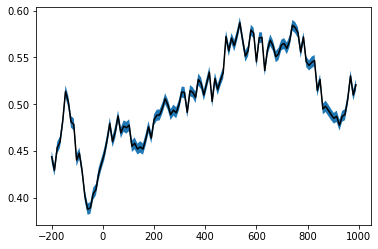

In [2]:
max_abs_tmass, max_pos, max_neg, first_cluster, second_cluster, res = cluster_analysis_procedure(11, False, "permutation", [-200, 1000, [100], 10], [3, 15, 10])

Valid positive windows are: [64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 89, 93, 94, 95, 96, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110]

Valid negative windows are: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 34, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 92]

Positive clusters are: [[440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650], [730, 740, 750, 760], [800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900]]

Negative clusters are: [[-200, -190, -180, -170, -160, -150, -140, -130, -120, -110, -100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80], [180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420]]

Positive tmass values are: [0, 

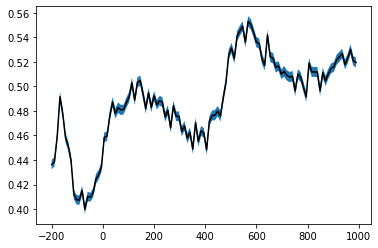

In [5]:
max_abs_tmass, max_pos, max_neg, first_cluster, second_cluster, res = cluster_analysis_procedure(9, False, "permutation", [-200, 1000, [100], 10], [3, 15, 20])

In [25]:
import statistics
negsum = 0
negsum += stats.ttest_1samp(result[0][15], .5).statistic
negsum += stats.ttest_1samp(result[0][16], .5).statistic
negsum += stats.ttest_1samp(result[0][17], .5).statistic
negsum += stats.ttest_1samp(result[0][18], .5).statistic
negsum += stats.ttest_1samp(result[0][19], .5).statistic

In [26]:
negsum

-87.39154049028781

In [3]:
# For null distribution
# MAKE SURE YOU TURN OFF PRINT FUNCTION

itr = 5
arrTmass_max = []
arrTmass_pos = []
arrTmass_neg = []
arrTmass_first = []
arrTmass_second = []

for i in range(itr):
    max_abs_tmass, max_pos, max_neg, first_cluster, second_cluster, res = cluster_analysis_procedure(11, True, "permutation", [-200, 1000, [100], 10], [3, 15, 10])
    arrTmass_max.append(round(max_abs_tmass, 4))
    arrTmass_pos.append(round(max_pos, 4))
    arrTmass_neg.append(round(max_neg, 4))
    arrTmass_first.append(round(first_cluster, 4))
    arrTmass_second.append(round(second_cluster, 4))
    print(i)


0


KeyboardInterrupt: 

In [4]:
print(arrTmass_max, arrTmass_pos, arrTmass_neg, arrTmass_first, arrTmass_second)

[37.7706, 86.0815, 43.5717, 55.3828, 47.4452, 51.5443, 60.3727, 44.7519, 27.1108, 27.9367, 85.0431, 68.9658, 70.3056, 34.9713, 35.2423, 32.7097, 45.9417, 33.8517, 50.5908, 38.6297, 49.83, 38.2183, 35.241, 57.5469, 23.1368, 36.4751, 54.7724, 27.8859, 79.7592, 43.7767, 68.5676, 27.8198, 47.6526, 36.4984, 47.7468, 55.5013, 27.825, 45.8113, 42.5589, 44.9728, 28.2393, 35.7842, 7.9222, 67.8098, 24.599, 38.662, 42.5619, 27.5449, 36.0589, 62.1649] [14.1647, 0, 27.3406, 23.0859, 19.3207, 0, 19.5185, 21.6304, 10.8895, 20.9581, 12.3373, 12.0471, 0, 23.6527, 11.0317, 0, 21.4347, 14.6666, 16.4683, 0, 23.8452, 15.33, 16.3249, 9.9244, 22.7852, 0, 11.9794, 9.6913, 25.1925, 13.8307, 24.6247, 21.1636, 36.3998, 15.3249, 0, 26.1594, 0, 10.0498, 21.4977, 0, 0, 10.8295, 0, 0, 18.1719, 10.741, 31.2748, 19.455, 0, 19.9249] [37.7706, 86.0815, 43.5717, 55.3828, 47.4452, 51.5443, 60.3727, 44.7519, 27.1108, 27.9367, 85.0431, 68.9658, 70.3056, 34.9713, 35.2423, 32.7097, 45.9417, 33.8517, 50.5908, 38.6297, 49.83, 3

In [9]:

#10msWindow 10msStep
arrTmass_max = [54.8193, 59.2527, 70.1853, 73.033, 118.8727, 57.0171, 50.9222, 51.3249, 43.6185, 73.2743, 76.315, 56.8063, 42.0587, 38.2616, 59.7161, 57.7394, 57.5067, 57.3551, 46.629, 63.9252, 52.6528, 78.3771, 35.2912, 65.0565, 78.3934, 52.6091, 69.1422, 33.8379, 108.8984, 53.1898, 60.8925, 47.5139, 47.0318, 60.7277, 30.8587, 61.1088, 63.4764, 95.0508, 101.4355, 49.0167, 76.2336, 47.5315, 48.2619, 30.9521, 30.7117, 69.6123, 71.5816, 63.2377, 56.1619, 113.1585]
arrTmass_pos =[17.095, 10.0556, 0, 17.777, 27.9684, 38.0192, 20.5728, 12.0959, 0, 25.0629, 23.1263, 24.4148, 22.713, 13.1419, 23.5899, 0, 20.5697, 23.663, 15.7487, 15.3836, 19.6274, 0, 15.9215, 18.709, 22.1125, 28.0273, 21.2015, 0, 22.1061, 20.6852, 16.2264, 18.1455, 0, 0, 20.2947, 0, 18.1764, 17.0897, 17.5721, 17.5599, 22.3075, 16.4647, 13.821, 25.5281, 23.0933, 17.8007, 13.6833, 21.1785, 16.158, 23.0052]
arrTmass_neg = [54.8193, 59.2527, 70.1853, 73.033, 118.8727, 57.0171, 50.9222, 51.3249, 43.6185, 73.2743, 76.315, 56.8063, 42.0587, 38.2616, 59.7161, 57.7394, 57.5067, 57.3551, 46.629, 63.9252, 52.6528, 78.3771, 35.2912, 65.0565, 78.3934, 52.6091, 69.1422, 33.8379, 108.8984, 53.1898, 60.8925, 47.5139, 47.0318, 60.7277, 30.8587, 61.1088, 63.4764, 95.0508, 101.4355, 49.0167, 76.2336, 47.5315, 48.2619, 30.9521, 30.7117, 69.6123, 71.5816, 63.2377, 56.1619, 113.1585]
arrTmass_first = [54.8193, 59.2527, 70.1853, 73.033, 118.8727, 57.0171, 50.9222, 51.3249, 43.6185, 73.2743, 76.315, 56.8063, 42.0587, 38.2616, 59.7161, 57.7394, 57.5067, 57.3551, 46.629, 63.9252, 52.6528, 78.3771, 35.2912, 65.0565, 78.3934, 52.6091, 69.1422, 33.8379, 108.8984, 53.1898, 60.8925, 47.5139, 47.0318, 60.7277, 30.8587, 61.1088, 63.4764, 95.0508, 101.4355, 49.0167, 76.2336, 47.5315, 48.2619, 30.9521, 30.7117, 69.6123, 71.5816, 63.2377, 56.1619, 113.1585]
arrTmass_second =[22.8171, 44.5347, 46.6429, 35.7983, 78.4979, 50.5141, 33.433, 30.7436, 38.5741, 54.3101, 42.4219, 51.4961, 35.7389, 38.1978, 25.1724, 56.8804, 47.6415, 44.8187, 35.9419, 61.0917, 26.4565, 42.6346, 34.4301, 38.7396, 28.7742, 51.7851, 54.8467, 21.8912, 47.0323, 51.3399, 44.9235, 33.2982, 37.6047, 36.3708, 26.4301, 36.6851, 22.8498, 33.2248, 49.7514, 31.8752, 36.8894, 42.6722, 42.5222, 28.3304, 30.2637, 38.2732, 60.929, 32.9607, 34.453, 29.231]

arrTmass_max.extend([38.5949, 42.5629, 73.9303, 39.6189, 52.4414, 47.9078, 63.3846, 47.0879, 55.4177, 40.3784, 35.6815, 33.9408, 79.1856, 59.4296, 72.7873, 83.5205, 37.4332, 67.3667, 57.2471, 38.3212, 58.6162, 55.8003, 38.8816, 54.4105, 53.3779, 66.4545, 45.5565, 44.4717, 79.5682, 72.9042, 88.4318, 54.3216, 53.3373, 82.6645, 94.6196, 82.2299, 49.9985, 74.4865, 34.8791, 35.8913, 84.0072, 55.3392, 91.9849, 74.54, 86.8286, 71.3751, 58.2405, 34.9681, 49.3409, 73.7651])
arrTmass_pos.extend([0, 13.7851, 20.8496, 14.659, 26.0938, 11.2643, 12.5809, 21.7666, 14.6617, 33.2418, 24.4747, 33.2288, 14.5397, 0, 13.1825, 0, 18.4, 0, 9.3062, 18.3544, 15.6928, 16.1097, 14.6476, 21.6995, 0, 18.9366, 0, 17.6125, 32.0693, 21.7984, 11.1638, 14.2352, 18.6866, 22.1607, 0, 12.1828, 14.8347, 26.8727, 14.6857, 13.197, 11.204, 0, 0, 37.2285, 12.368, 18.7753, 14.026, 19.8795, 22.1727, 41.8974])
arrTmass_neg.extend([38.5949, 42.5629, 73.9303, 39.6189, 52.4414, 47.9078, 63.3846, 47.0879, 55.4177, 40.3784, 35.6815, 33.9408, 79.1856, 59.4296, 72.7873, 83.5205, 37.4332, 67.3667, 57.2471, 38.3212, 58.6162, 55.8003, 38.8816, 54.4105, 53.3779, 66.4545, 45.5565, 44.4717, 79.5682, 72.9042, 88.4318, 54.3216, 53.3373, 82.6645, 94.6196, 82.2299, 49.9985, 74.4865, 34.8791, 35.8913, 84.0072, 55.3392, 91.9849, 74.54, 86.8286, 71.3751, 58.2405, 34.9681, 49.3409, 73.7651])
arrTmass_first.extend([38.5949, 42.5629, 73.9303, 39.6189, 52.4414, 47.9078, 63.3846, 47.0879, 55.4177, 40.3784, 35.6815, 33.9408, 79.1856, 59.4296, 72.7873, 83.5205, 37.4332, 67.3667, 57.2471, 38.3212, 58.6162, 55.8003, 38.8816, 54.4105, 53.3779, 66.4545, 45.5565, 44.4717, 79.5682, 72.9042, 88.4318, 54.3216, 53.3373, 82.6645, 94.6196, 82.2299, 49.9985, 74.4865, 34.8791, 35.8913, 84.0072, 55.3392, 91.9849, 74.54, 86.8286, 71.3751, 58.2405, 34.9681, 49.3409, 73.7651])
arrTmass_second.extend([30.3013, 39.3816, 40.8047, 37.7558, 44.2614, 31.5957, 45.5851, 33.988, 44.3613, 34.5277, 30.8243, 33.2288, 35.9381, 53.9777, 34.1127, 40.6934, 26.428, 56.1139, 39.098, 35.8434, 54.1301, 38.234, 35.7229, 38.997, 31.4082, 65.4022, 42.2816, 32.6923, 56.5364, 59.7383, 33.0926, 39.4618, 48.4354, 40.4121, 69.3693, 69.0044, 33.4651, 37.8452, 32.3221, 34.6224, 23.3161, 28.5347, 44.2667, 67.9904, 38.4738, 30.4558, 51.266, 34.0964, 44.4238, 72.1155])

arrTmass_max.extend([43.6485, 71.0753, 104.2747, 75.3742, 63.6922, 71.227, 35.7232, 51.6825, 53.515, 64.0254, 53.8875, 52.6467, 81.8331, 64.9712, 37.0922, 105.0229, 57.2664, 57.338, 51.4185, 57.16, 66.6687, 59.1246, 52.6614, 118.9178, 64.709, 33.0191, 40.4815, 31.9517, 81.2207, 38.3864, 43.8751, 58.0022, 26.0686, 51.3741, 55.6924, 55.2556, 55.7191, 47.7467, 39.4664, 83.228, 29.0733, 35.8918, 58.4073, 52.0927, 81.3719, 80.0054, 84.4304, 50.8517, 65.6314, 66.7387])
arrTmass_pos.extend([25.6633, 0, 22.2666, 21.193, 19.7145, 28.1259, 8.8614, 20.8054, 23.3022, 0, 14.2545, 12.0561, 21.6256, 22.6119, 14.018, 0, 0, 25.1909, 0, 17.0821, 31.213, 17.3489, 21.8844, 0, 17.4035, 0, 19.4473, 18.7046, 24.6513, 19.7818, 0, 21.4103, 19.869, 16.3027, 17.5525, 13.7397, 20.4477, 14.9796, 32.439, 17.5123, 19.5937, 0, 22.1536, 16.6996, 14.6368, 28.352, 23.2019, 9.8118, 21.7641, 15.7537])
arrTmass_neg.extend([43.6485, 71.0753, 104.2747, 75.3742, 63.6922, 71.227, 35.7232, 51.6825, 53.515, 64.0254, 53.8875, 52.6467, 81.8331, 64.9712, 37.0922, 105.0229, 57.2664, 57.338, 51.4185, 57.16, 66.6687, 59.1246, 52.6614, 118.9178, 64.709, 33.0191, 40.4815, 31.9517, 81.2207, 38.3864, 43.8751, 58.0022, 26.0686, 51.3741, 55.6924, 55.2556, 55.7191, 47.7467, 39.4664, 83.228, 29.0733, 35.8918, 58.4073, 52.0927, 81.3719, 80.0054, 84.4304, 50.8517, 65.6314, 66.7387])
arrTmass_first.extend([43.6485, 71.0753, 104.2747, 75.3742, 63.6922, 71.227, 35.7232, 51.6825, 53.515, 64.0254, 53.8875, 52.6467, 81.8331, 64.9712, 37.0922, 105.0229, 57.2664, 57.338, 51.4185, 57.16, 66.6687, 59.1246, 52.6614, 118.9178, 64.709, 33.0191, 40.4815, 31.9517, 81.2207, 38.3864, 43.8751, 58.0022, 26.0686, 51.3741, 55.6924, 55.2556, 55.7191, 47.7467, 39.4664, 83.228, 29.0733, 35.8918, 58.4073, 52.0927, 81.3719, 80.0054, 84.4304, 50.8517, 65.6314, 66.7387])
arrTmass_second.extend([36.311, 44.6528, 25.6993, 68.9135, 37.0877, 56.8538, 30.1031, 47.5961, 43.9851, 56.0205, 46.8223, 26.9763, 35.5284, 37.3743, 29.9961, 29.9856, 40.4784, 31.267, 36.7615, 39.7945, 42.2239, 53.7741, 44.797, 53.2867, 51.7395, 30.5688, 39.3318, 23.0396, 34.5025, 37.5622, 28.6354, 38.9259, 23.7071, 40.096, 37.5526, 36.4902, 43.0225, 47.5414, 32.439, 42.4403, 28.9845, 30.3579, 53.3986, 22.4171, 61.4524, 68.1698, 71.9806, 50.5278, 30.0096, 48.3755])

# #100msWindow 10msStep
# arrTmass_max = [43.6485, 71.0753, 104.2747, 75.3742, 63.6922, 71.227, 35.7232, 51.6825, 53.515, 64.0254, 53.8875, 52.6467, 81.8331, 64.9712, 37.0922, 105.0229, 57.2664, 57.338, 51.4185, 57.16, 66.6687, 59.1246, 52.6614, 118.9178, 64.709, 33.0191, 40.4815, 31.9517, 81.2207, 38.3864, 43.8751, 58.0022, 26.0686, 51.3741, 55.6924, 55.2556, 55.7191, 47.7467, 39.4664, 83.228, 29.0733, 35.8918, 58.4073, 52.0927, 81.3719, 80.0054, 84.4304, 50.8517, 65.6314, 66.7387, 64.4017, 32.1726, 79.2548, 49.4031, 48.9353, 29.4205, 39.9559, 77.6552, 39.7318, 54.8503, 69.3695, 66.4662, 76.4493, 31.4828, 58.8997, 61.8595, 46.3888, 63.3547, 120.5085, 27.4527, 74.3999, 58.3912, 76.091, 60.2515, 54.6732, 71.3391, 29.1491, 40.9598, 38.7717, 56.8926, 41.1439, 59.82, 52.6657, 65.2963, 48.959, 74.052, 45.3257, 98.4904, 67.2025, 118.2071, 57.2622, 114.5146, 76.3122, 45.5088, 36.7164, 34.8763, 59.9118, 36.6428, 49.074, 65.6708]
# arrTmass_pos = [20.2181, 16.5441, 16.5894, 0, 28.6269, 18.4858, 17.2851, 18.7873, 12.9141, 19.9749, 33.4431, 0, 16.0426, 15.3333, 31.5785, 21.0952, 15.3893, 0, 0, 10.8471, 27.7125, 23.0472, 35.3775, 0, 0, 10.3926, 12.3928, 0, 8.4991, 22.4256, 20.6871, 0, 19.3316, 25.3884, 7.6839, 19.2381, 0, 23.6535, 17.0826, 37.3223, 11.7785, 18.2965, 15.9406, 13.6116, 33.4785, 27.4068, 12.3014, 27.8656, 19.0595, 17.5217]
# arrTmass_neg = [64.4017, 32.1726, 79.2548, 49.4031, 48.9353, 29.4205, 39.9559, 77.6552, 39.7318, 54.8503, 69.3695, 66.4662, 76.4493, 31.4828, 58.8997, 61.8595, 46.3888, 63.3547, 120.5085, 27.4527, 74.3999, 58.3912, 76.091, 60.2515, 54.6732, 71.3391, 29.1491, 40.9598, 38.7717, 56.8926, 41.1439, 59.82, 52.6657, 65.2963, 48.959, 74.052, 45.3257, 98.4904, 67.2025, 118.2071, 57.2622, 114.5146, 76.3122, 45.5088, 36.7164, 34.8763, 59.9118, 36.6428, 49.074, 65.6708]
# arrTmass_first = [64.4017, 32.1726, 79.2548, 49.4031, 48.9353, 29.4205, 39.9559, 77.6552, 39.7318, 54.8503, 69.3695, 66.4662, 76.4493, 31.4828, 58.8997, 61.8595, 46.3888, 63.3547, 120.5085, 27.4527, 74.3999, 58.3912, 76.091, 60.2515, 54.6732, 71.3391, 29.1491, 40.9598, 38.7717, 56.8926, 41.1439, 59.82, 52.6657, 65.2963, 48.959, 74.052, 45.3257, 98.4904, 67.2025, 118.2071, 57.2622, 114.5146, 76.3122, 45.5088, 36.7164, 34.8763, 59.9118, 36.6428, 49.074, 65.6708]
# arrTmass_second = [59.9965, 30.5601, 44.7288, 46.8847, 41.3242, 28.8057, 38.4137, 49.0535, 30.2214, 54.171, 59.3782, 30.5032, 31.0341, 26.8335, 49.4377, 61.221, 29.0589, 33.9062, 40.8479, 23.3244, 29.9319, 28.6104, 49.2459, 39.7256, 49.4367, 19.875, 28.9923, 27.2804, 28.0603, 44.451, 36.2424, 49.5781, 41.7715, 54.391, 45.7197, 35.2226, 41.3807, 52.6921, 38.2075, 46.0636, 41.8163, 33.4318, 56.3839, 44.6763, 33.4785, 30.3738, 37.9334, 28.812, 34.6311, 50.0689]


# arrTmass_max.extend()
# arrTmass_pos.extend()
# arrTmass_neg.extend()
# arrTmass_first.extend()
# arrTmass_second.extend()


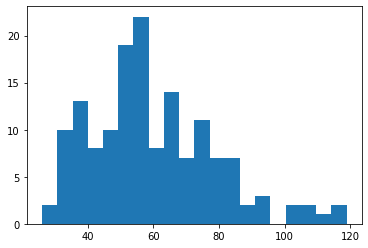

In [10]:
plt.hist(arrTmass_max, bins = 20)
plt.show()

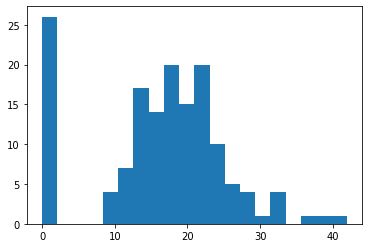

In [11]:
plt.hist(arrTmass_pos, bins = 20)
plt.show()

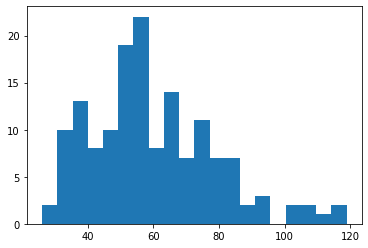

In [12]:
plt.hist(arrTmass_neg, bins = 20)
plt.show()

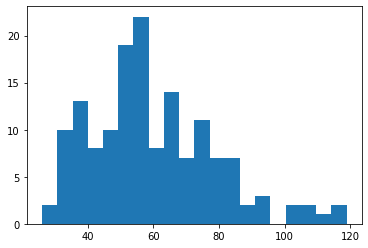

In [13]:
plt.hist(arrTmass_first, bins = 20)
plt.show()

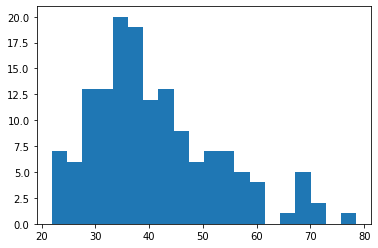

In [14]:
plt.hist(arrTmass_second, bins = 20)
plt.show()